In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('C:\\Users\\601-30\\Desktop\\dsbay2\\DSBAY2\\datasets\\spotify_churn_dataset.csv')

In [3]:
# Display the first few rows of the dataframe
data.head(6)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
5,6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0


In [7]:
data.shape


(8000, 12)

In [8]:
print(data.isnull().sum())  # Missing values
print(data.duplicated().sum())

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64
0


Text(0.5, 1.0, 'Distribution of Listening Time')

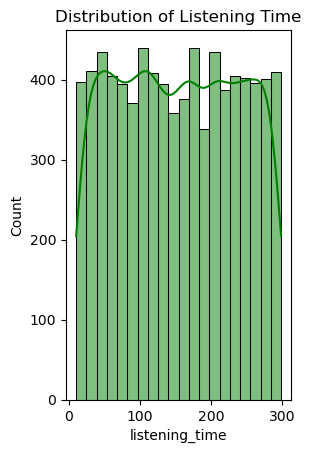

In [11]:
plt.subplot(1, 2, 2)
sns.histplot(data['listening_time'], kde=True, color='green')
plt.title('Distribution of Listening Time')

Text(0.5, 1.0, 'Distribution of Age')

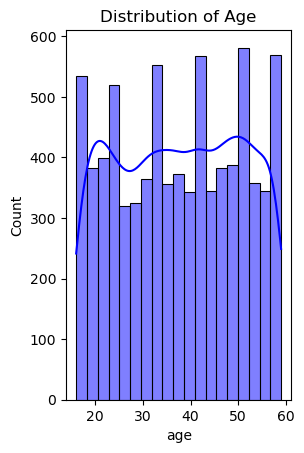

In [12]:
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Distribution of Age')

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
print(data.describe())

          user_id          age  listening_time  songs_played_per_day  \
count  8000.00000  8000.000000     8000.000000           8000.000000   
mean   4000.50000    37.662125      154.068250             50.127250   
std    2309.54541    12.740359       84.015596             28.449762   
min       1.00000    16.000000       10.000000              1.000000   
25%    2000.75000    26.000000       81.000000             25.000000   
50%    4000.50000    38.000000      154.000000             50.000000   
75%    6000.25000    49.000000      227.000000             75.000000   
max    8000.00000    59.000000      299.000000             99.000000   

         skip_rate  ads_listened_per_week  offline_listening   is_churned  
count  8000.000000            8000.000000        8000.000000  8000.000000  
mean      0.300127               6.943875           0.747750     0.258875  
std       0.173594              13.617953           0.434331     0.438044  
min       0.000000               0.000000      

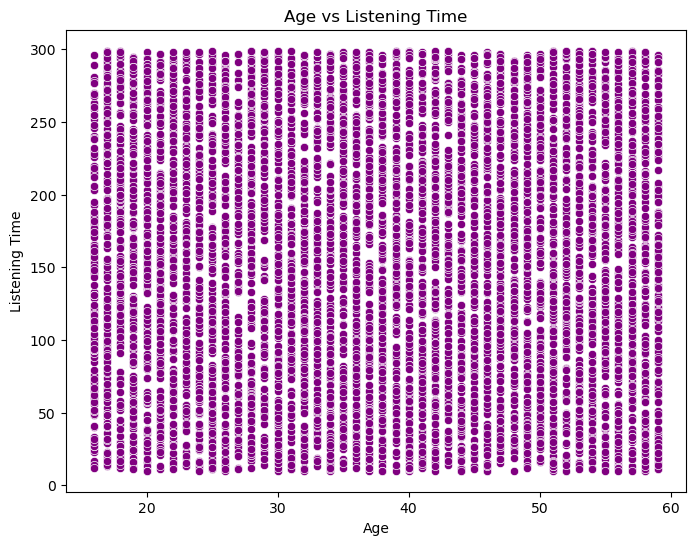

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='listening_time', data=data, color='purple')
plt.title('Age vs Listening Time')
plt.xlabel('Age')
plt.ylabel('Listening Time')
plt.show()

In [15]:
correlation = data[['age', 'listening_time']].corr()
print("Correlation between Age and Listening Time:")
print(correlation)

Correlation between Age and Listening Time:
                     age  listening_time
age             1.000000       -0.012975
listening_time -0.012975        1.000000


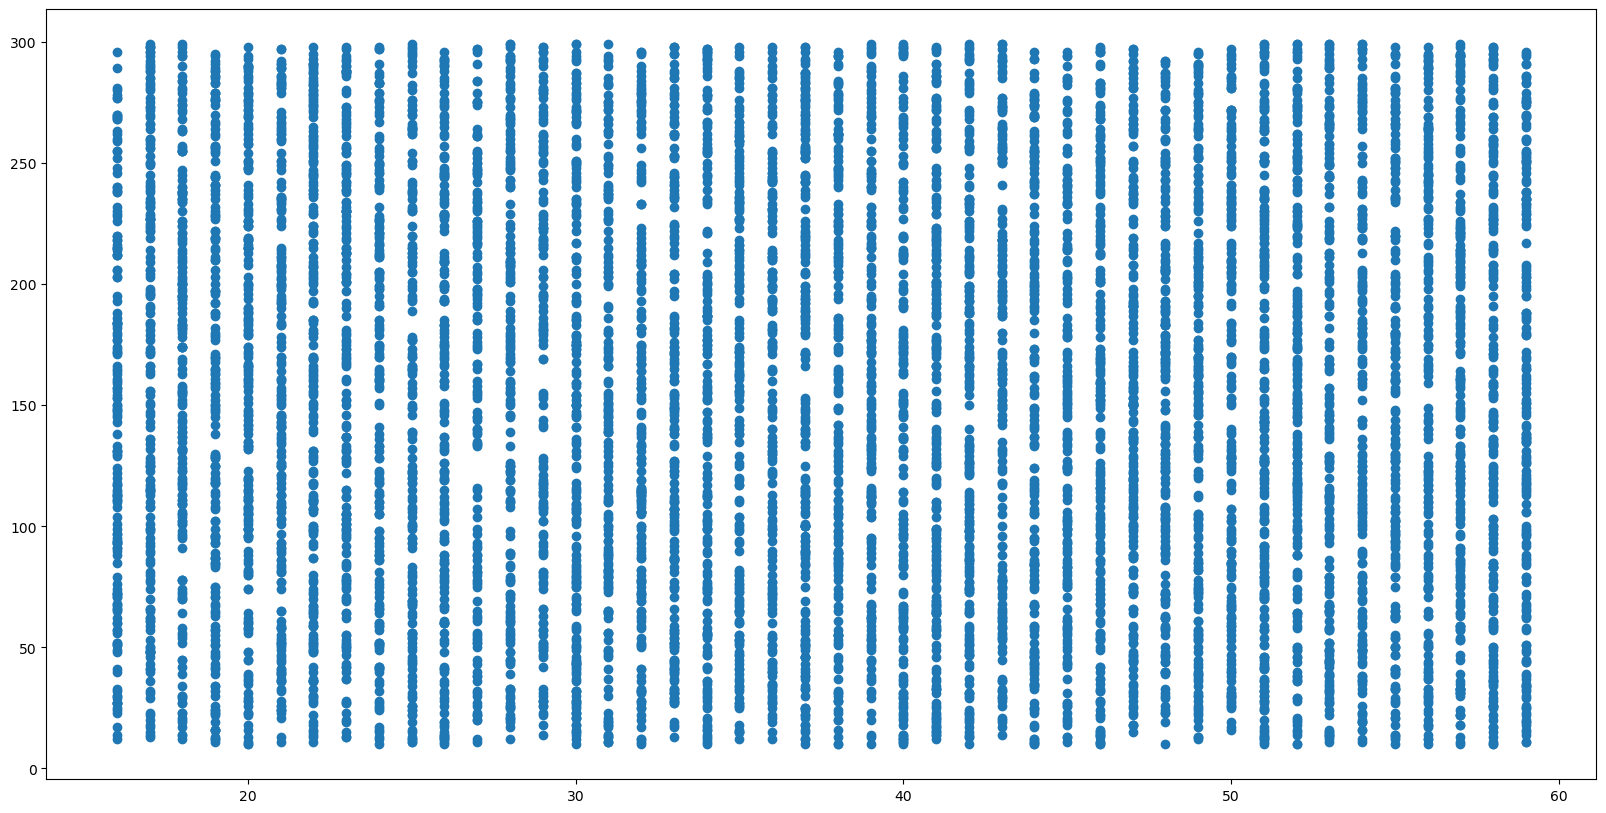

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(x="age",y="listening_time",data=data)
plt.show()

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Define age groups (adjust the age ranges to your preference)
bins = [18, 25, 35, 45, 55, 100]  # Age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56+']  # Age group labels

# Create a new column 'age_group' based on the defined bins
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Check the distribution of data across the age groups
print(data['age_group'].value_counts())

# Group the data by 'age_group' and get listening times in each group
groups = [data[data['age_group'] == group]['listening_time'] for group in labels]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Print the results
print(f"ANOVA Test Result: F-statistic = {f_stat}, P-value = {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference in listening time across the age groups.")
else:
    print("There is no significant difference in listening time across the age groups.")


age_group
46-55    1877
36-45    1815
26-35    1728
18-25    1318
56+       913
Name: count, dtype: int64
ANOVA Test Result: F-statistic = 1.6875874340635157, P-value = 0.14980511630350674
There is no significant difference in listening time across the age groups.
